In [13]:
import os
import sys
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
CLASSES_DIR = os.getenv("CLASSES_DIR")
READ_DIR = os.getenv("READ_DIR")

sys.path.append(CLASSES_DIR)

#from ex_class import Ex_Class
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
fiis = pd.read_csv(f'{READ_DIR}\\Módulo 01\\statusinvest-busca-avancada_fiis.csv', sep=';')
fiis.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,AURB11,"0,00","0,550000","0,00","88,43",NaN,NaN,"1,51",NaN,NaN,"77.870.925,46","5,00",Ativa,"880.560,00"
1,BPRP11,"91,58","0,916654","11,55","109,15","0,84","954,55","0,17","4,87","-4,61","147.336.512,12","175,00",Passiva,"1.349.837,00"
2,BTCR11,"88,00","0,900000","7,22","95,27","0,92","652.774,65","8,00","32,78","0,81","458.252.683,73","16.934,00",Ativa,"4.810.097,00"
3,BTLG11,"98,09","0,740000","9,11","98,26","1,00","4.082.171,49","2,78","9,76","-2,19","2.069.982.451,70","214.705,00",Ativa,"21.066.892,00"
4,BVAR11,"0,00","12,910000","0,00","1.092,69",NaN,NaN,"3,37","11,06",NaN,"683.520.786,98","69,00",Passiva,"625.540,00"


In [15]:
def cvt_to_number(x: str):
    ans = x.replace('.', '')
    ans = ans.replace(',', '.')
    return float(ans)

fiis['PRECO'] = fiis['PRECO'].apply(lambda x: cvt_to_number(x))
fiis['P/VP'] = fiis['P/VP'].fillna('0,00')
fiis['P/VP'] = fiis['P/VP'].apply(lambda x: cvt_to_number(x))

In [16]:
fiis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TICKER                   450 non-null    object 
 1   PRECO                    450 non-null    float64
 2   ULTIMO DIVIDENDO         386 non-null    object 
 3   DY                       450 non-null    object 
 4   VALOR PATRIMONIAL COTA   450 non-null    object 
 5   P/VP                     450 non-null    float64
 6   LIQUIDEZ MEDIA DIARIA    335 non-null    object 
 7   PERCENTUAL EM CAIXA      440 non-null    object 
 8   CAGR DIVIDENDOS 3 ANOS   188 non-null    object 
 9    CAGR VALOR CORA 3 ANOS  199 non-null    object 
 10  PATRIMONIO               450 non-null    object 
 11  N COTISTAS               449 non-null    object 
 12  GESTAO                   450 non-null    object 
 13   N COTAS                 450 non-null    object 
dtypes: float64(2), object(12)


In [17]:
test = fiis.loc[(fiis['PRECO'] >= 400) & (fiis['PRECO'] <= 1000)]
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 19 to 409
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TICKER                   17 non-null     object 
 1   PRECO                    17 non-null     float64
 2   ULTIMO DIVIDENDO         14 non-null     object 
 3   DY                       17 non-null     object 
 4   VALOR PATRIMONIAL COTA   17 non-null     object 
 5   P/VP                     17 non-null     float64
 6   LIQUIDEZ MEDIA DIARIA    12 non-null     object 
 7   PERCENTUAL EM CAIXA      17 non-null     object 
 8   CAGR DIVIDENDOS 3 ANOS   5 non-null      object 
 9    CAGR VALOR CORA 3 ANOS  6 non-null      object 
 10  PATRIMONIO               17 non-null     object 
 11  N COTISTAS               17 non-null     object 
 12  GESTAO                   17 non-null     object 
 13   N COTAS                 17 non-null     object 
dtypes: float64(2), object(12)
memor

In [18]:
upper_bound = fiis['PRECO'].quantile(0.95)

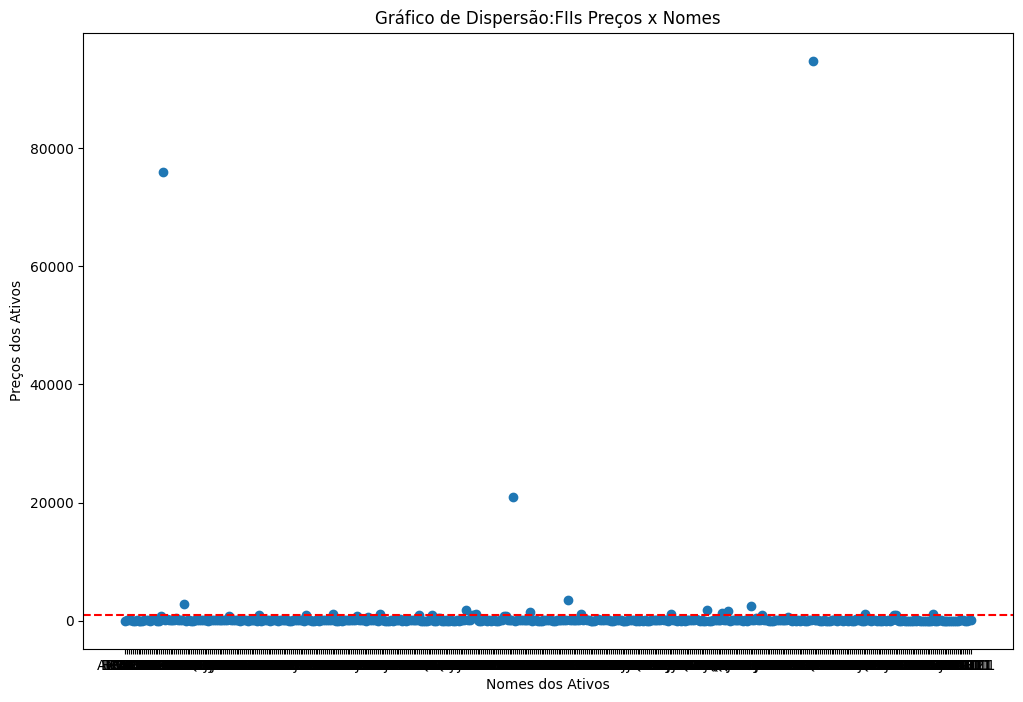

In [19]:
# cria o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(fiis['TICKER'], fiis['PRECO'])
plt.axhline(upper_bound,color='r', linestyle='--')

# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

# mostra o gráfico
plt.show()

In [20]:
lower_bound = fiis['PRECO'].quantile(0.05)
fiis = fiis.loc[(fiis['PRECO'] < upper_bound) & (fiis['PRECO'] > lower_bound)]

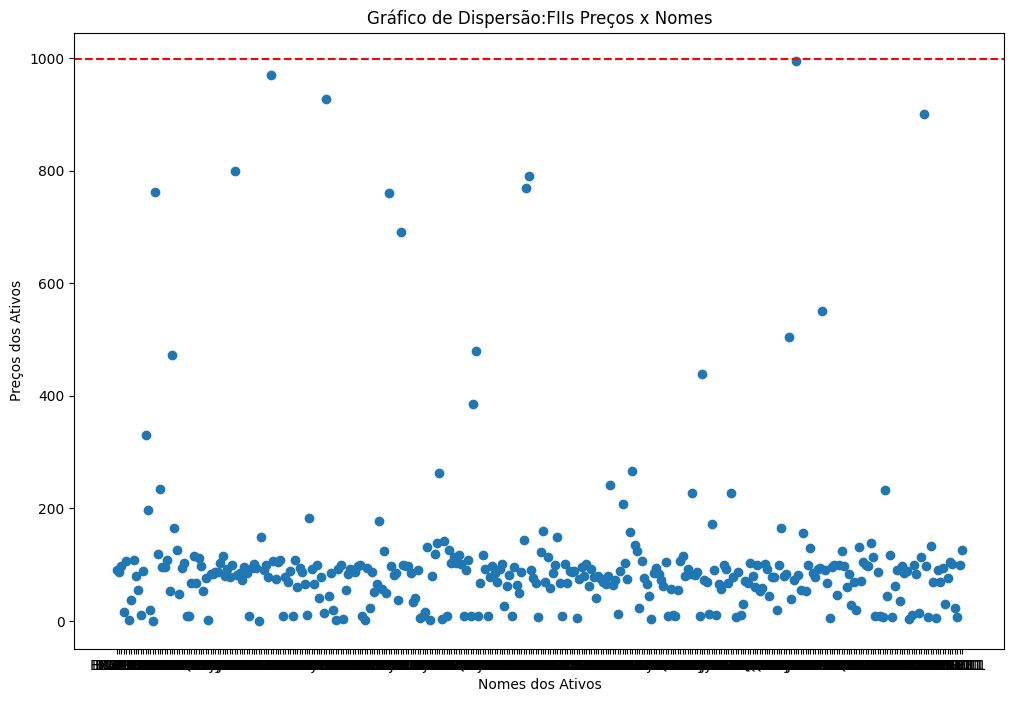

In [21]:
# cria o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(fiis['TICKER'], fiis['PRECO'])
plt.axhline(upper_bound,color='r', linestyle='--')

# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

# mostra o gráfico
plt.show()

In [22]:
fiis = fiis.loc[(fiis['PRECO'] < 200) & (fiis['PRECO'] > 0)]

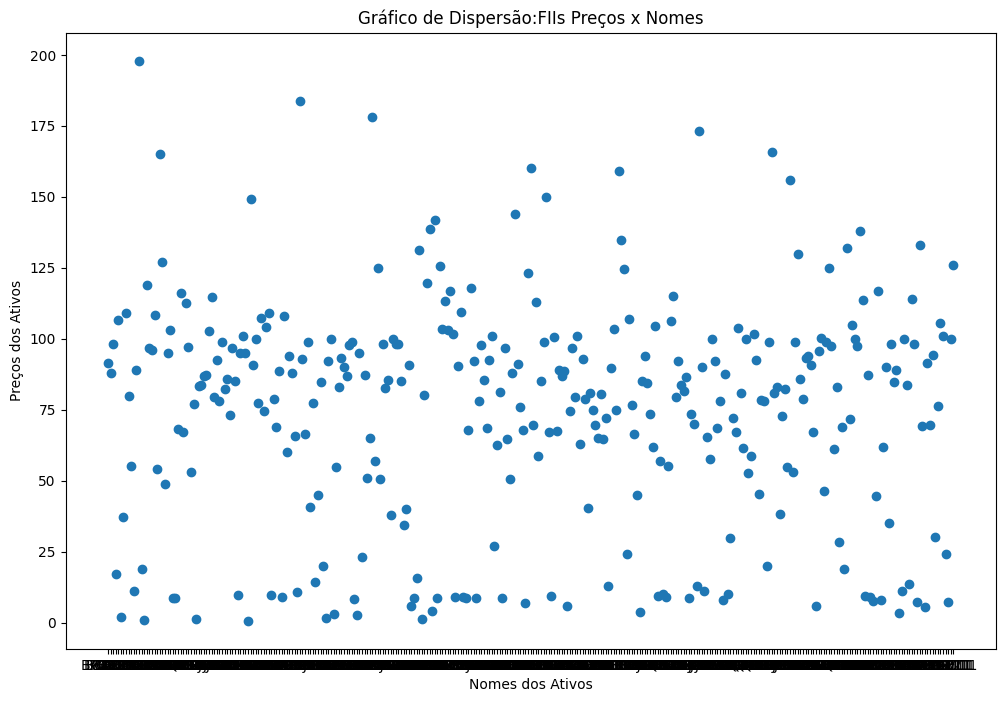

In [23]:
# cria o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(fiis['TICKER'], fiis['PRECO'])

# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

# mostra o gráfico
plt.show()

In [24]:
fiis = fiis.loc[fiis['P/VP'] < 3]

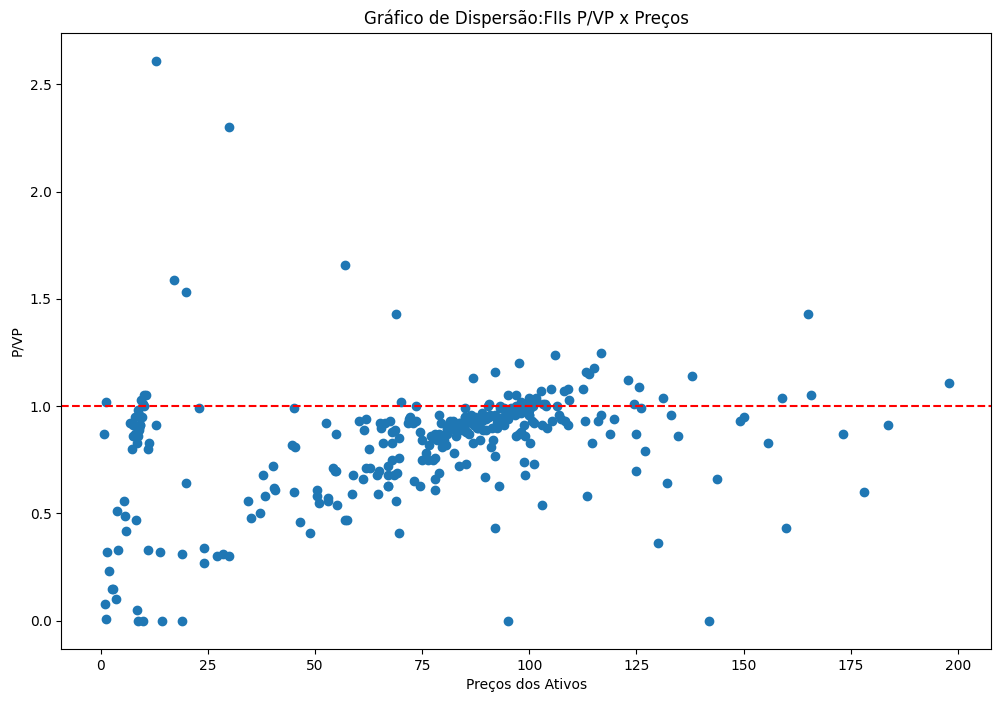

In [25]:
# cria o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(fiis['PRECO'], fiis['P/VP'])
plt.axhline(1.0,color='r', linestyle='--')

# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs P/VP x Preços")
plt.ylabel("P/VP")
plt.xlabel("Preços dos Ativos")

# mostra o gráfico
plt.show()

In [31]:
# Importe os dados históricos do FII para um DataFrame
df = pd.read_csv(f'{READ_DIR}\\Módulo 01\\VISC11 Historical Data.csv', sep=',')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/10/2023,103.50,104.70,106.80,103.50,41.15K,-1.14%
1,03/09/2023,104.69,105.04,105.44,104.60,16.35K,-0.33%
2,03/08/2023,105.04,105.00,105.90,105.00,18.17K,0.04%
3,03/07/2023,105.00,104.96,105.50,104.57,26.25K,0.04%
4,03/06/2023,104.96,104.48,105.47,104.01,20.52K,0.46%


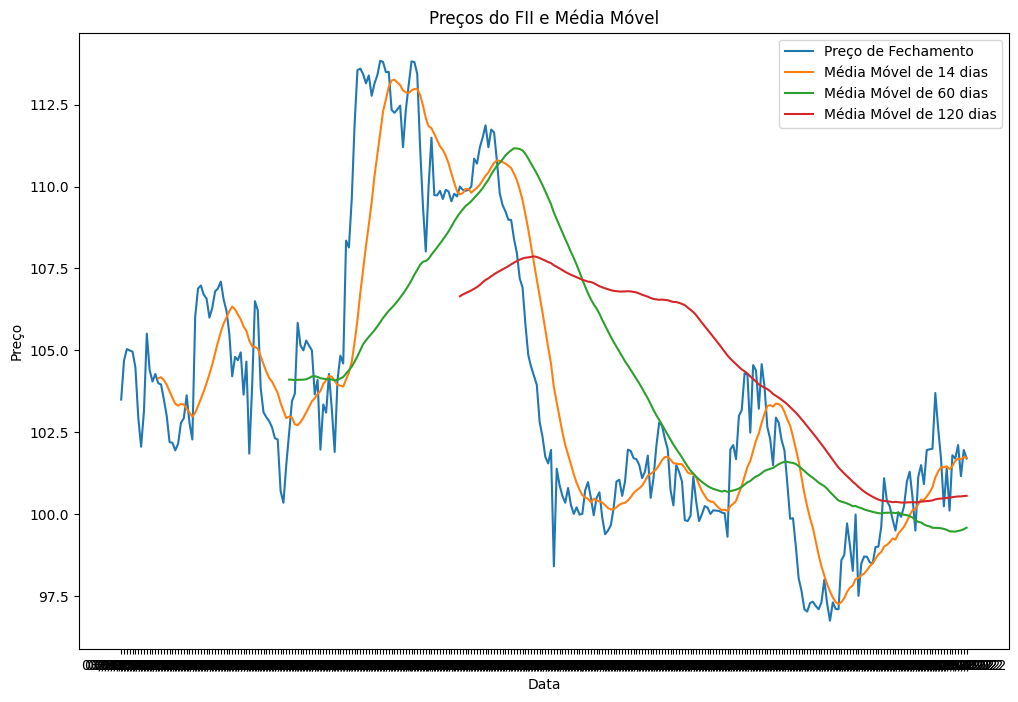

In [32]:
# Calcule a média móvel do FII
df['MA14'] = df['Price'].rolling(window=14).mean()
df['MA60'] = df['Price'].rolling(window=60).mean()
df['MA120'] = df['Price'].rolling(window=120).mean()

# Crie um gráfico com os preços de fechamento e a média móvel
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Price'], label='Preço de Fechamento')
plt.plot(df['Date'], df['MA14'], label='Média Móvel de 14 dias')
plt.plot(df['Date'], df['MA60'], label='Média Móvel de 60 dias')
plt.plot(df['Date'], df['MA120'], label='Média Móvel de 120 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preços do FII e Média Móvel')
plt.legend()
plt.show()